# 구대웅

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data=pd.read_csv("../data/test13.csv")

In [3]:
data

,height,weight,label
0,186,47,thin
1,143,74,fat
2,144,55,fat
3,173,60,normal
4,170,74,fat
...,...,...,...
19995,198,67,thin
19996,150,41,thin
19997,127,42,fat
19998,170,65,normal


In [48]:
X=data.iloc[:,0:2]
y=data.iloc[:,2]
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y)
Y = e.transform(y)
from keras.utils.np_utils import to_categorical
Y = tf.keras.utils.to_categorical(Y)

In [15]:
Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   random_state = 1)

In [17]:
# 모델의 설정
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
import os
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [19]:
 # 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [20]:
history =model.fit(X_train, Y_train,
                   validation_split=0.2, 
                   epochs=500, 
                   batch_size=1,
                   verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.39641, saving model to ./model/01-0.3964.hdf5

Epoch 00002: val_loss improved from 0.39641 to 0.35435, saving model to ./model/02-0.3543.hdf5

Epoch 00003: val_loss improved from 0.35435 to 0.14185, saving model to ./model/03-0.1419.hdf5

Epoch 00004: val_loss improved from 0.14185 to 0.09656, saving model to ./model/04-0.0966.hdf5

Epoch 00005: val_loss did not improve from 0.09656

Epoch 00006: val_loss did not improve from 0.09656

Epoch 00007: val_loss improved from 0.09656 to 0.09018, saving model to ./model/07-0.0902.hdf5

Epoch 00008: val_loss did not improve from 0.09018

Epoch 00009: val_loss did not improve from 0.09018

Epoch 00010: val_loss improved from 0.09018 to 0.07848, saving model to ./model/10-0.0785.hdf5

Epoch 00011: val_loss did not improve from 0.07848

Epoch 00012: val_loss did not improve from 0.07848

Epoch 00013: val_loss did not improve from 0.07848

Epoch 00014: val_loss did not improve from 0.07848

Epoch 00015


Epoch 00149: val_loss did not improve from 0.04604

Epoch 00150: val_loss did not improve from 0.04604

Epoch 00151: val_loss did not improve from 0.04604

Epoch 00152: val_loss did not improve from 0.04604

Epoch 00153: val_loss did not improve from 0.04604

Epoch 00154: val_loss did not improve from 0.04604

Epoch 00155: val_loss did not improve from 0.04604

Epoch 00156: val_loss did not improve from 0.04604

Epoch 00157: val_loss did not improve from 0.04604

Epoch 00158: val_loss did not improve from 0.04604

Epoch 00159: val_loss did not improve from 0.04604

Epoch 00160: val_loss did not improve from 0.04604

Epoch 00161: val_loss did not improve from 0.04604

Epoch 00162: val_loss did not improve from 0.04604

Epoch 00163: val_loss did not improve from 0.04604

Epoch 00164: val_loss did not improve from 0.04604

Epoch 00165: val_loss did not improve from 0.04604

Epoch 00166: val_loss did not improve from 0.04604

Epoch 00167: val_loss did not improve from 0.04604

Epoch 00168


Epoch 00302: val_loss did not improve from 0.03896

Epoch 00303: val_loss did not improve from 0.03896

Epoch 00304: val_loss did not improve from 0.03896

Epoch 00305: val_loss did not improve from 0.03896

Epoch 00306: val_loss did not improve from 0.03896

Epoch 00307: val_loss did not improve from 0.03896

Epoch 00308: val_loss did not improve from 0.03896

Epoch 00309: val_loss did not improve from 0.03896

Epoch 00310: val_loss did not improve from 0.03896

Epoch 00311: val_loss did not improve from 0.03896

Epoch 00312: val_loss did not improve from 0.03896

Epoch 00313: val_loss did not improve from 0.03896

Epoch 00314: val_loss did not improve from 0.03896

Epoch 00315: val_loss did not improve from 0.03896

Epoch 00316: val_loss did not improve from 0.03896

Epoch 00317: val_loss did not improve from 0.03896

Epoch 00318: val_loss did not improve from 0.03896

Epoch 00319: val_loss did not improve from 0.03896

Epoch 00320: val_loss did not improve from 0.03896

Epoch 00321

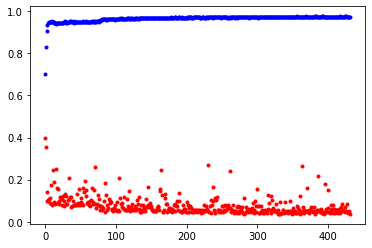

In [22]:
import matplotlib.pyplot as plt
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [27]:
from keras.models import load_model  
model = load_model('./model/332-0.0371.hdf5')
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

157/157 [==============================] - 0s 676us/step - loss: 0.0351 - accuracy: 0.9910

 Accuracy: 0.9910


In [31]:
model = load_model('./model/332-0.0371.hdf5')

In [32]:
new_test = np.array([[170,45],[164,80]])
new_test

array([[170,  45],
       [164,  80]])

In [53]:
Y_pred = model.predict(new_test)
Y_pred

array([[0.0000000e+00, 9.4023362e-06, 9.9999058e-01],
       [1.0000000e+00, 5.3620016e-21, 0.0000000e+00]], dtype=float32)

In [43]:
model.predict_classes(new_test,verbose=0)

array([2, 0], dtype=int64)

In [49]:
np.unique(y)[model.predict_classes(new_test,verbose=0)]

array(['thin', 'fat'], dtype=object)